In [4]:
# reference from https://www.kaggle.com/code/djonafegnem/chicago-crime-data-analysis/notebook


import pandas as pd
from pandas import read_csv
crimes = read_csv('Dataset/Chicago_Crimes_2012_to_2017.csv', index_col='Date')

In [5]:
print(type(crimes))

<class 'pandas.core.frame.DataFrame'>


In [6]:
crimes = crimes.iloc[:, 3: ]
crimes.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,
05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [7]:
crimes.index = pd.to_datetime(crimes.index)

In [9]:
print(crimes.shape)
print(crimes.head())

(1456714, 19)
                                   Block  IUCR            Primary Type  \
Date                                                                     
2016-05-03 23:40:00   013XX S SAWYER AVE  0486                 BATTERY   
2016-05-03 21:40:00   061XX S DREXEL AVE  0486                 BATTERY   
2016-05-03 23:31:00  053XX W CHICAGO AVE  0470  PUBLIC PEACE VIOLATION   
2016-05-03 22:10:00    049XX W FULTON ST  0460                 BATTERY   
2016-05-03 22:00:00    003XX N LOTUS AVE  0820                   THEFT   

                                 Description Location Description  Arrest  \
Date                                                                        
2016-05-03 23:40:00  DOMESTIC BATTERY SIMPLE            APARTMENT    True   
2016-05-03 21:40:00  DOMESTIC BATTERY SIMPLE            RESIDENCE   False   
2016-05-03 23:31:00         RECKLESS CONDUCT               STREET   False   
2016-05-03 22:10:00                   SIMPLE             SIDEWALK   False   
2016-

In [10]:
s = crimes[['Primary Type']]

In [11]:
s.head()

,Primary Type
Date,
2016-05-03 23:40:00,BATTERY
2016-05-03 21:40:00,BATTERY
2016-05-03 23:31:00,PUBLIC PEACE VIOLATION
2016-05-03 22:10:00,BATTERY
2016-05-03 22:00:00,THEFT


In [12]:
crime_count = pd.DataFrame(s.groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index())

In [13]:
crime_count.head()

,Primary Type,counts
0,THEFT,329460
1,BATTERY,263700
2,CRIMINAL DAMAGE,155455
3,NARCOTICS,135240
4,ASSAULT,91289


In [14]:
crime_count.shape

(33, 2)

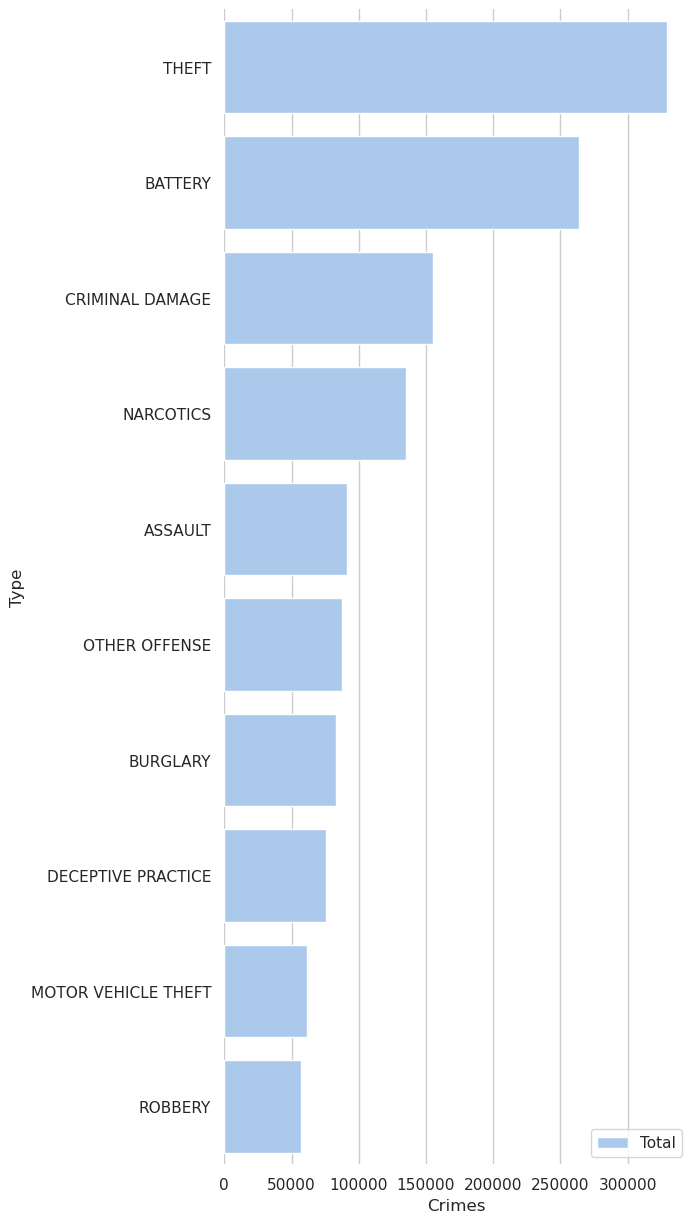

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="counts", y="Primary Type", data=crime_count.iloc[:10, :],
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",
       xlabel="Crimes")
sns.despine(left=True, bottom=True)

# Add a legend and informative axis label
plt.show()

In [16]:
#Arrest
crimes_2012 = crimes.loc['2012']
crimes_2013 = crimes.loc['2013']
crimes_2014 = crimes.loc['2014']
crimes_2015 = crimes.loc['2015']
crimes_2016 = crimes.loc['2016']
crimes_2017 = crimes.loc['2017']

## Yearly crimes
arrest_yearly = crimes[crimes['Arrest'] == True]['Arrest']

In [17]:
print(arrest_yearly.head())

Date
2016-05-03 23:40:00    True
2016-05-03 21:44:00    True
2016-05-03 23:11:00    True
2016-05-04 11:15:00    True
2016-05-04 11:30:00    True
Name: Arrest, dtype: bool


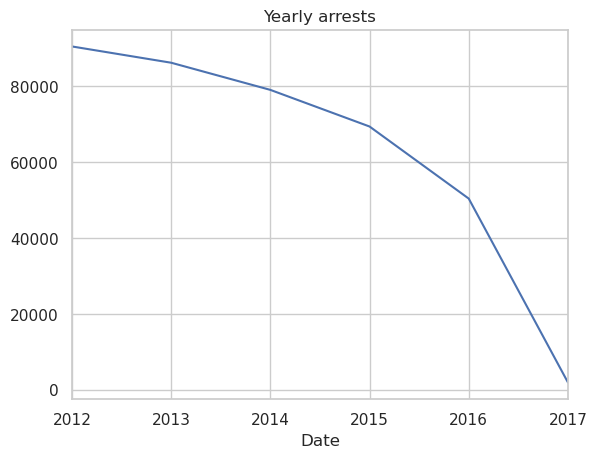

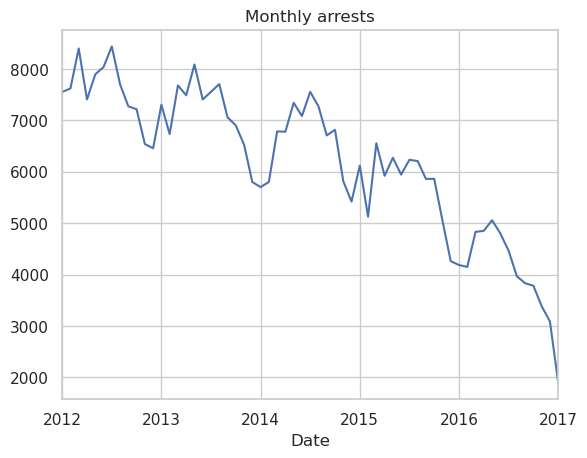

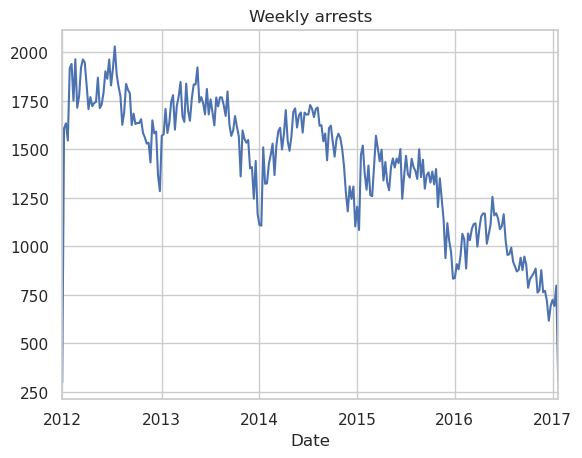

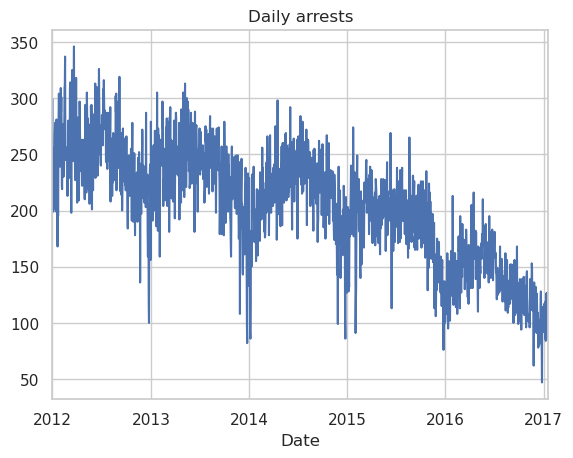

In [18]:
plt.subplot()
# yearly arrest
arrest_yearly.resample('A').sum().plot()
plt.title('Yearly arrests')
plt.show()
# Monthly arrest
arrest_yearly.resample('M').sum().plot()
plt.title('Monthly arrests')
plt.show()
# Weekly arrest
arrest_yearly.resample('W').sum().plot()
plt.title('Weekly arrests')
plt.show()
# daily arrest
arrest_yearly.resample('D').sum().plot()
plt.title('Daily arrests')
plt.show()
plt.show()


## Domestic violence¶

In [19]:
domestic_yearly = crimes[crimes['Domestic'] == True]['Domestic']
print(domestic_yearly.head())

Date
2016-05-03 23:40:00    True
2016-05-03 21:40:00    True
2016-05-03 22:00:00    True
2016-05-03 22:30:00    True
2016-05-03 23:11:00    True
Name: Domestic, dtype: bool


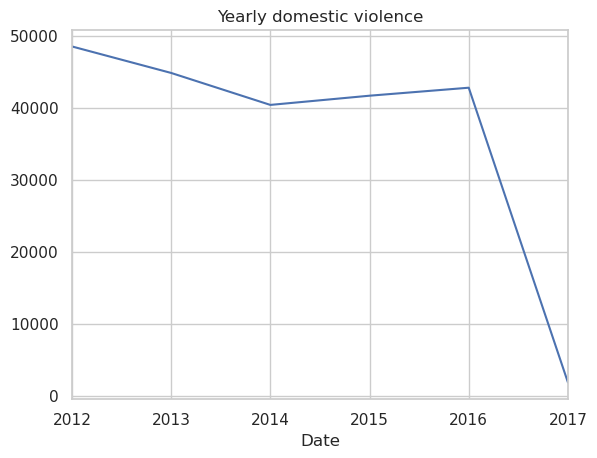

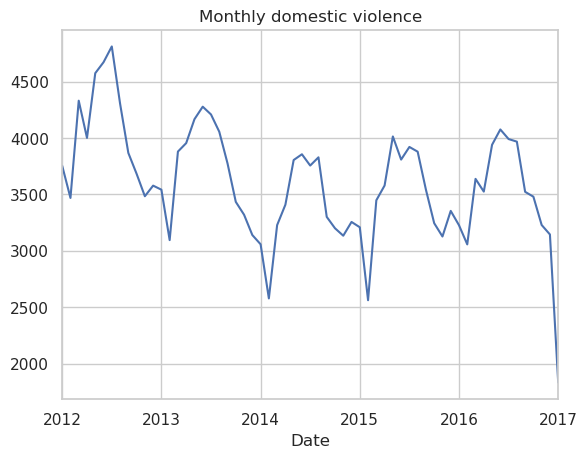

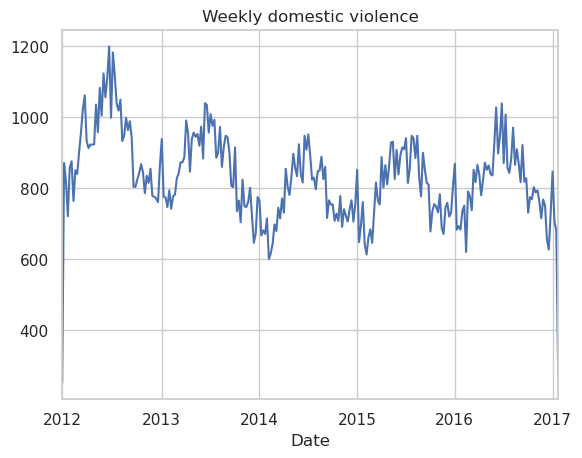

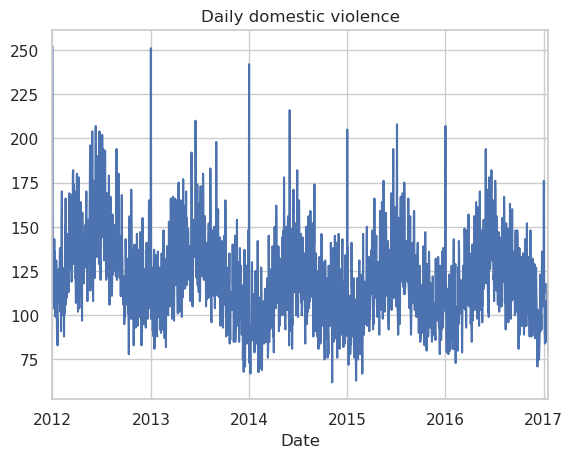

In [21]:
plt.subplot()
# yearly domestic violence
domestic_yearly.resample('A').sum().plot()
plt.title('Yearly domestic violence')
plt.show()
# Monthly domestic violence
domestic_yearly.resample('M').sum().plot()
plt.title('Monthly domestic violence')
plt.show()
# Weekly domestic violence
domestic_yearly.resample('W').sum().plot()
plt.title('Weekly domestic violence')
plt.show()
# daily domestic violence
domestic_yearly.resample('D').sum().plot()
plt.title('Daily domestic violence')
plt.show()
plt.show()

## Top 5 crimes trend over the years

In [30]:
theft_2012 = pd.DataFrame(crimes_2012[crimes_2012['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2013 = pd.DataFrame(crimes_2013[crimes_2013['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2014 = pd.DataFrame(crimes_2014[crimes_2014['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2015 = pd.DataFrame(crimes_2015[crimes_2015['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2016 = pd.DataFrame(crimes_2016[crimes_2016['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])

In [43]:
print(theft_2012)

                        Primary Type
Date                                
2012-08-08 17:30:00            THEFT
2012-10-05 17:00:00          BATTERY
2012-10-23 04:00:00          BATTERY
2012-10-26 04:00:00          BATTERY
2012-05-02 10:45:00          BATTERY
...                              ...
2012-01-23 22:00:00  CRIMINAL DAMAGE
2012-08-17 10:20:00          BATTERY
2012-02-09 06:39:00            THEFT
2012-12-29 14:37:00            THEFT
2012-03-06 22:15:00        NARCOTICS

[225823 rows x 1 columns]


In [44]:
grouper = theft_2012.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper_2013 = theft_2013.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper_2014 = theft_2014.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper_2015 = theft_2015.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper_2016 = theft_2016.groupby([pd.TimeGrouper('M'), 'Primary Type'])

KeyError: 'The grouper name Date is not found'

In [26]:
data_2012 = grouper['Primary Type'].count().unstack()
data_2013 = grouper_2013['Primary Type'].count().unstack()
data_2014 = grouper_2014['Primary Type'].count().unstack()
data_2015 = grouper_2015['Primary Type'].count().unstack()
data_2016 = grouper_2016['Primary Type'].count().unstack()

NameError: name 'grouper' is not defined